<a href="https://colab.research.google.com/github/charlchua-ciit/EMC-006/blob/main/GAMING_DATASET_FINALS_DATA_SCIENCE_GAMER_TYPE_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialize and import the neccessary libraries

In [ ]:
import pandas as pd
import numpy as np

#Dataset

In [16]:
df= pd.read_csv('/content/drive/Shareddrives/FINALS DATASETS/gaming_dataset.csv')
df.head()


,game_id,player_id,game_title,game_rating,game_demo_graphics,genre,age,gender,playing_time,study_time,review_category,game_review,preferred_genre
0,c321ee48-19f3-4850-bd4d-9cf821c10de0,d343c995-1e40-4da6-968c-f184cc69ffe5,Extended well-modulated software,1,Ultra,Action,20,Male,3.65,4.17,negative,Boring disappointed awful boring hate boring h...,Action
1,746e9eb2-bbb4-42ec-97c2-253bd39e65e5,0a782e42-128d-40a7-b14b-b24f3c66531e,Polarized multi-state open architecture,10,High,RPG,16,Non-binary,5.03,4.13,positive,Love good great.,Strategy
2,e69d344a-bc1d-483b-9411-03cad6478526,ec8598b7-afc0-4f98-a9a1-9045cd6d6e3c,Down-sized fresh-thinking ability,8,Medium,RPG,18,Non-binary,5.26,3.74,neutral,Ordinary ordinary decent mediocre fair fine de...,RPG
3,7e782b81-c1d0-4b7c-8479-3ef48a2bb5cd,0e8d132a-64af-46b3-8327-9a47f74c997f,Enterprise-wide methodical neural-net,6,Low,RPG,15,Female,3.92,5.29,neutral,Fair acceptable ordinary.,RPG
4,56bbd733-286f-4cff-b33d-a1a3923be0b7,46f75001-19e3-4677-83a0-be3acbb86399,Fully-configurable asymmetric analyzer,5,Medium,Action,18,Female,2.89,6.16,positive,Fantastic love good great awesome nice good.,Action


#EDA

In [17]:
df.describe()

,game_rating,age,playing_time,study_time
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.493000,18.062000,3.397500,5.583290
std,2.901788,1.979918,1.380346,1.397749
min,1.000000,15.000000,0.000000,1.930000
25%,3.000000,16.000000,2.407500,4.610000
50%,6.000000,18.000000,3.480000,5.500000
75%,8.000000,20.000000,4.400000,6.660000
max,10.000000,21.000000,6.000000,8.000000


##Any Insights on this Matter?

Taking mean of all values to create a profile implies that the average gamer in the data set is an 18 year old student who spends more time studying over gaming and has an average rating of 5.493.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


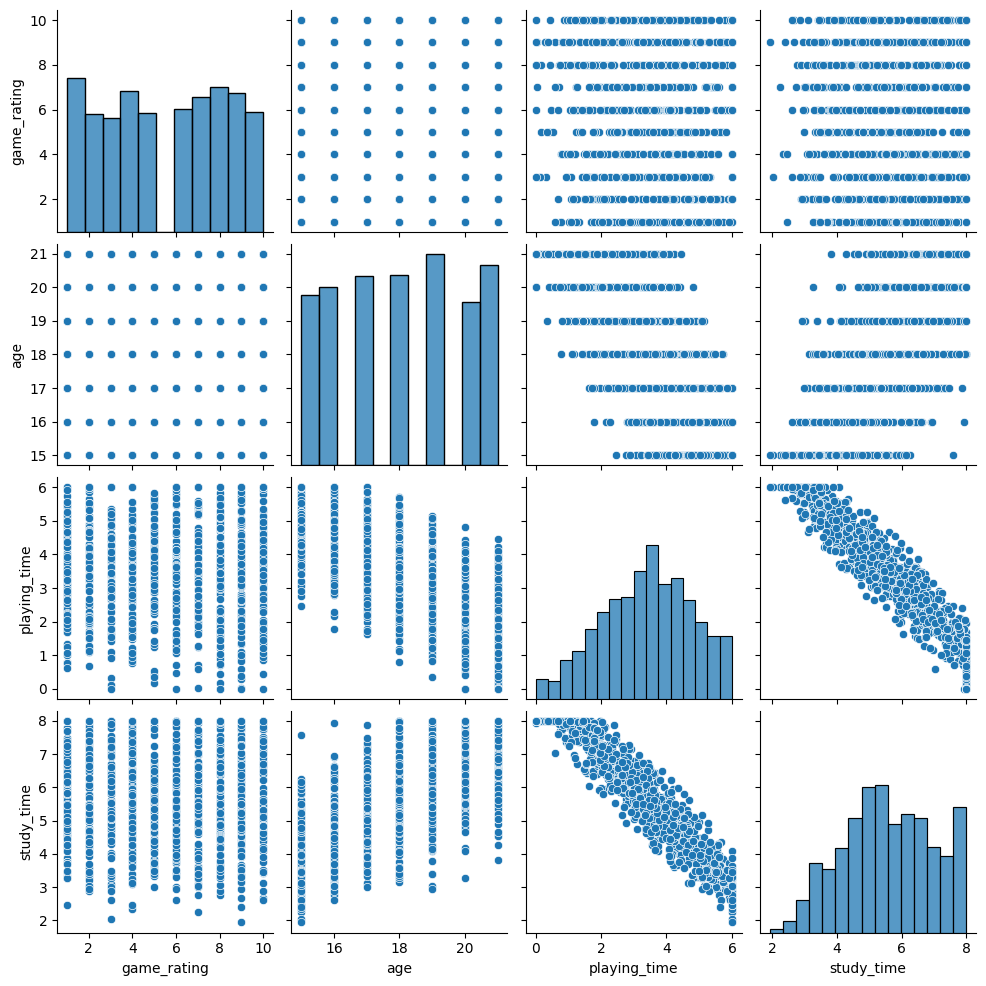

In [18]:
import seaborn as sns

sns.pairplot(df)

##What Can you Say About the Plots and Distributions?

1. Age does not contribute to player skill/rating, because at all ages there is a representative of all ratings
2. Study time and Playing time are inversely corelated, seeing as the higher one's play time is, the lower their study time is also.
3. As one gets older, they study more and play less, tying in to point 2.
4. Interestingly, playtime does not contribute much to game rating, as players of all game times can be found in all rating thresholds, suggesting that in this dataset, game rating cannot merely be improved by playing more.

#MODELLING

##Gamer Type Segmentation Using K-Means

###Initialization

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

###Load Dataset

In [30]:
df = pd.read_csv('/content/drive/Shareddrives/FINALS DATASETS/gaming_dataset.csv')
df.head()

,game_id,player_id,game_title,game_rating,game_demo_graphics,genre,age,gender,playing_time,study_time,review_category,game_review,preferred_genre
0,c321ee48-19f3-4850-bd4d-9cf821c10de0,d343c995-1e40-4da6-968c-f184cc69ffe5,Extended well-modulated software,1,Ultra,Action,20,Male,3.65,4.17,negative,Boring disappointed awful boring hate boring h...,Action
1,746e9eb2-bbb4-42ec-97c2-253bd39e65e5,0a782e42-128d-40a7-b14b-b24f3c66531e,Polarized multi-state open architecture,10,High,RPG,16,Non-binary,5.03,4.13,positive,Love good great.,Strategy
2,e69d344a-bc1d-483b-9411-03cad6478526,ec8598b7-afc0-4f98-a9a1-9045cd6d6e3c,Down-sized fresh-thinking ability,8,Medium,RPG,18,Non-binary,5.26,3.74,neutral,Ordinary ordinary decent mediocre fair fine de...,RPG
3,7e782b81-c1d0-4b7c-8479-3ef48a2bb5cd,0e8d132a-64af-46b3-8327-9a47f74c997f,Enterprise-wide methodical neural-net,6,Low,RPG,15,Female,3.92,5.29,neutral,Fair acceptable ordinary.,RPG
4,56bbd733-286f-4cff-b33d-a1a3923be0b7,46f75001-19e3-4677-83a0-be3acbb86399,Fully-configurable asymmetric analyzer,5,Medium,Action,18,Female,2.89,6.16,positive,Fantastic love good great awesome nice good.,Action


###Pre-Processing and Feature Engineering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

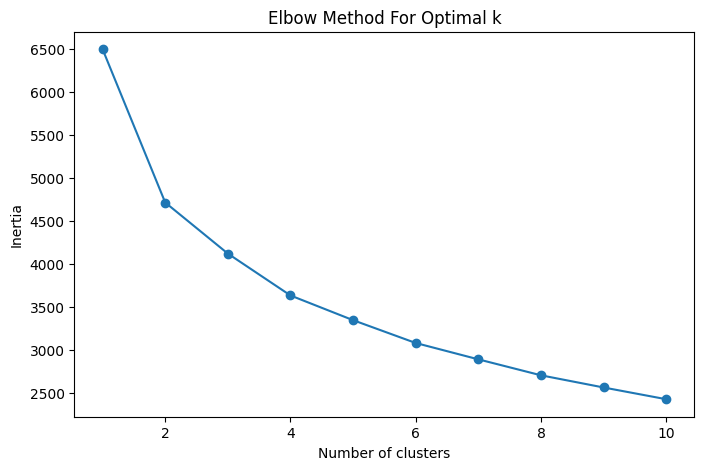

In [23]:
label_encoders = {}
categorical_columns = ['game_demo_graphics', 'gender', 'preferred_genre']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

scaler = StandardScaler()
numerical_columns = ['game_rating', 'playing_time', 'study_time', 'age']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df[['game_rating', 'playing_time', 'study_time', 'age', 'game_demo_graphics', 'gender']]

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11, 1), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 3

###Model

In [24]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Analyze and Visualize Clusters

In [25]:
# Denormalize the numerical columns for analysis
df[numerical_columns] = scaler.inverse_transform(df[numerical_columns])

# Analyze the clusters
cluster_means = df.groupby('cluster').mean(numeric_only=True)
print(cluster_means)

         game_rating  game_demo_graphics        age    gender  playing_time  \
cluster                                                                       
0           5.131944            1.472222  19.395833  0.427083      2.455729   
1           5.693208            1.454333  16.377049  1.470726      4.621874   
2           5.557895            1.501754  19.238596  2.561404      2.514772   

         study_time  preferred_genre  
cluster                               
0          6.477049         2.475694  
1          4.341593         2.470726  
2          6.540491         2.582456  


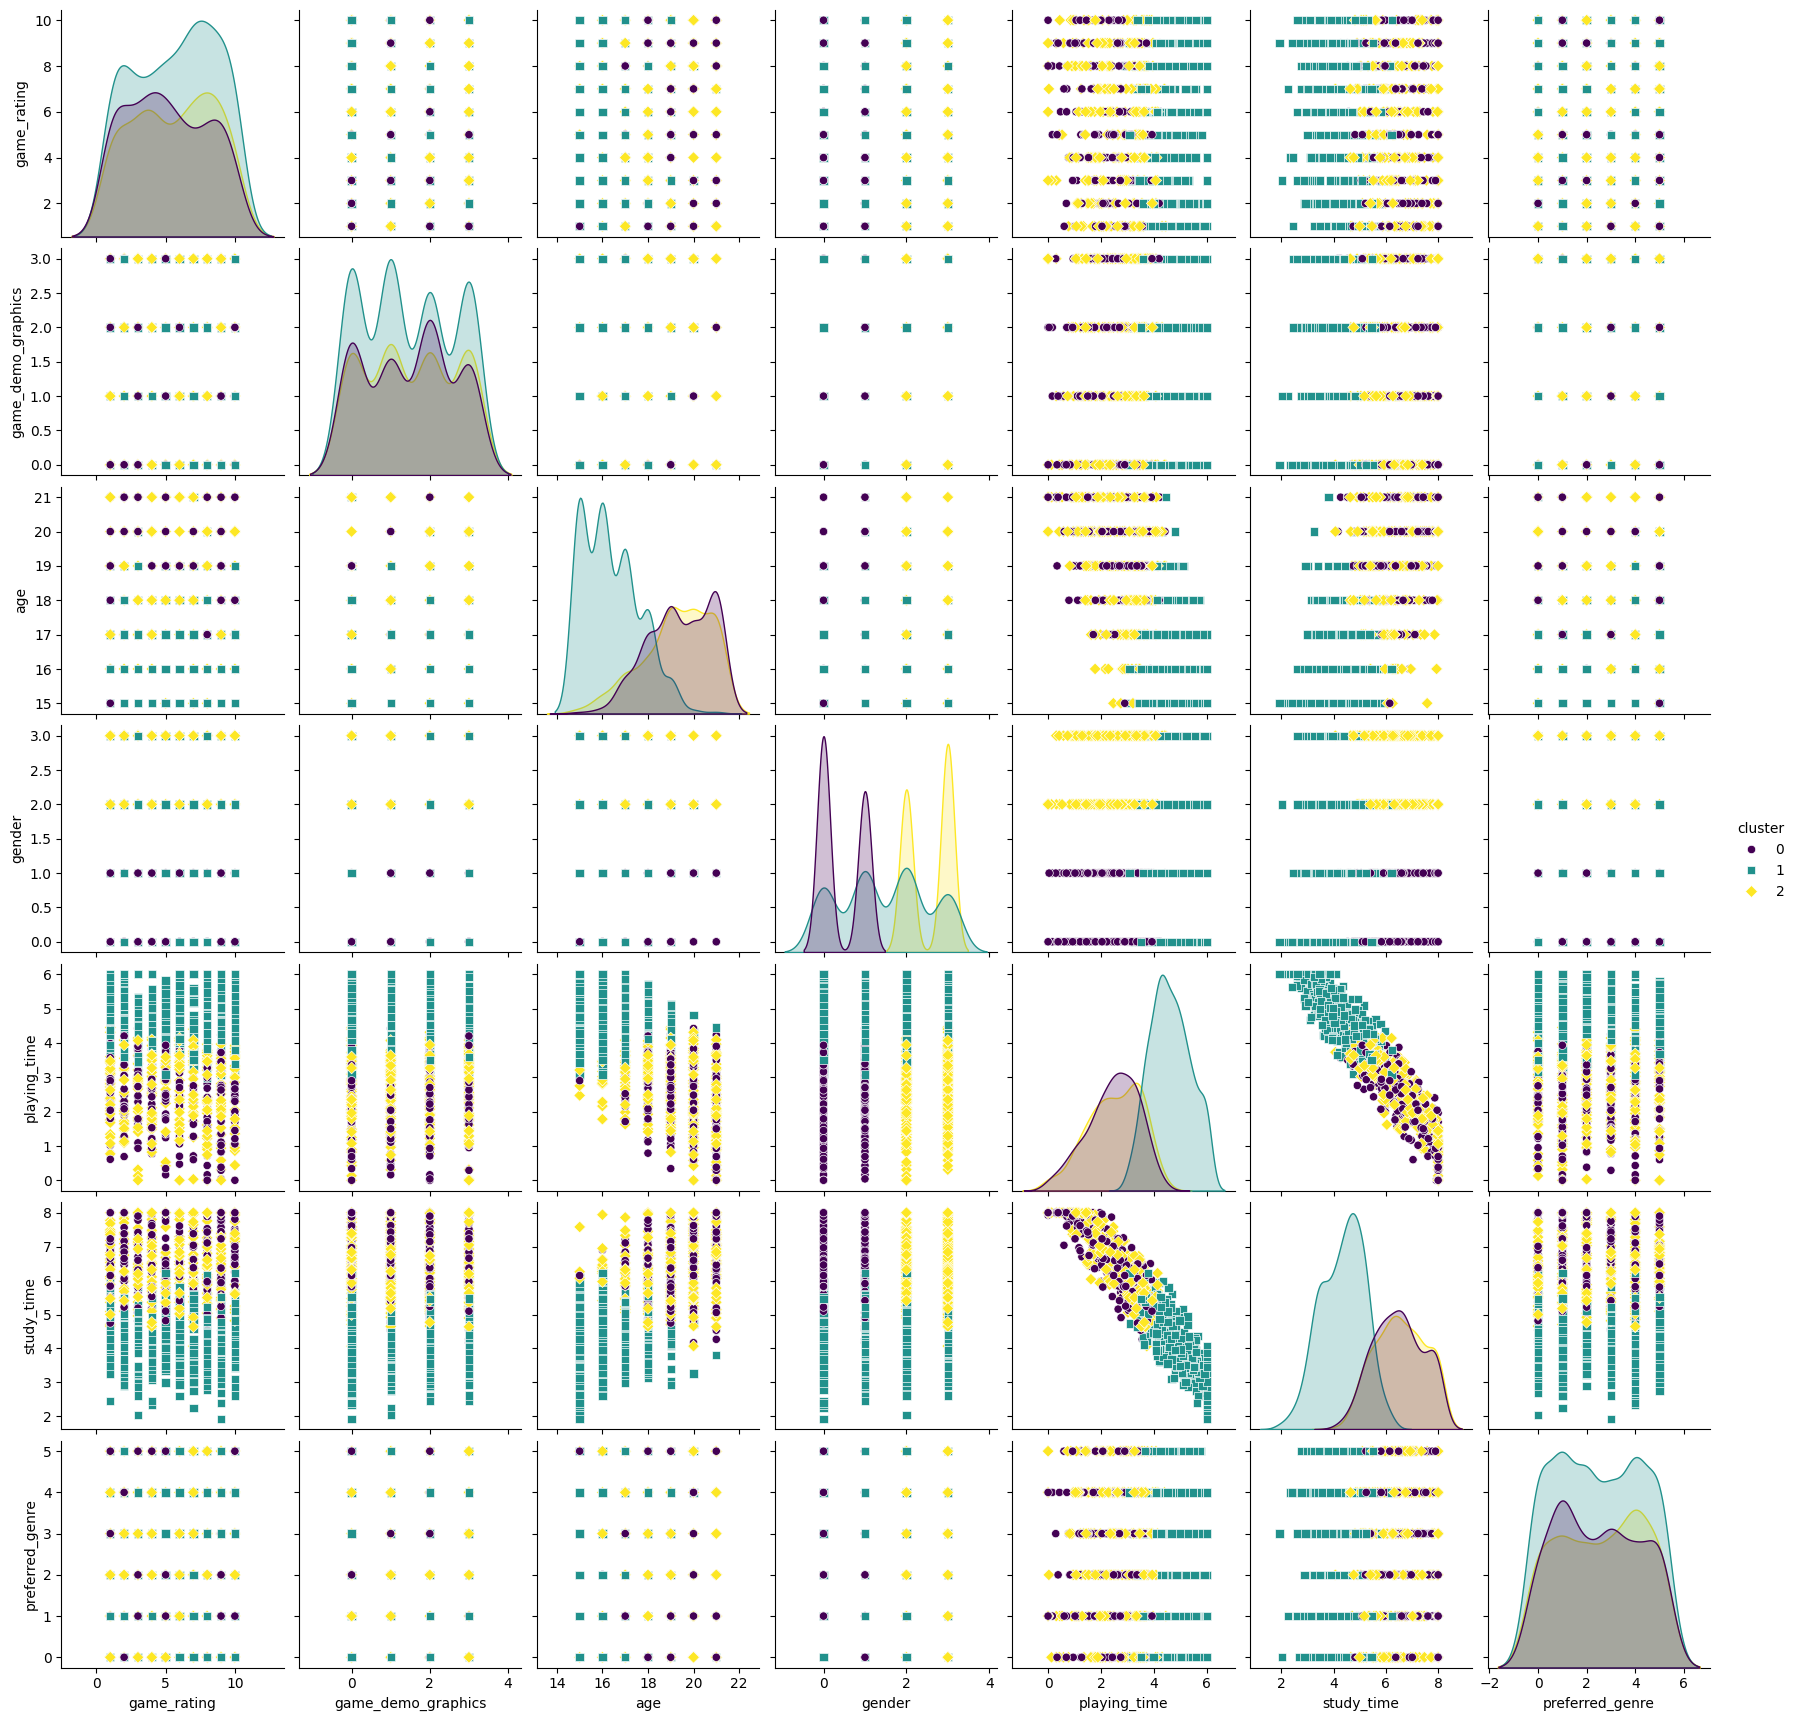

In [26]:
sns.pairplot(df, hue='cluster', palette='viridis', markers=['o', 's', 'D'])
plt.show()

##Name the Cluster Based On Categories that you see (eg. High Playing Time, Hard Core Gamer, etc.) (No Wrong Answers)

Blue Cluster - Hardcore Gamers

(high average playtime across multiple genres with relatively high ratings)

Purple Cluster - Casual Gamers of Gender 0 and 1

Yellow Cluster - Casual Gamers of Gender 2 and 3

(both yellow and purple clusters are practically identical, inhabiting the range with which one would classify as casual gamers, with the only notable separation between the two as their gender, therefore we classify purple and yellow as effectively the same group seperated by gender)